In [50]:
import numpy as np
import autograd.numpy as anp
import scipy as sy
from scipy.optimize import root
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np

import sympy as sy 
init_printing(use_unicode=True)

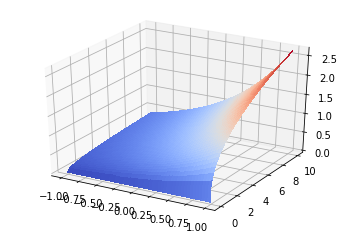

In [53]:
fig = plt.figure()
ax = fig.gca(projection='3d')

z = np.arange(-1, 1, 0.01)
k = np.arange(0, 10, 0.01)
z, k = np.meshgrid(z, k)
a = .4 
B = .98
k1 = B * a * np.exp(z) * (k**a)
surf = ax.plot_surface(z, k, k1 , cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
plt.show()   


In [57]:
import copy

params = (.4, .98, 2.5, .1, 1.5, .05, .5, 0)

def equations4(v, a, b, g, d, xi, tau, A, z):
    c, k, w, r, T, l = v
    rv = []
    rv.append( (1 - tau)* ((w*l)+(r-d)*k) + T - c )
    rv.append( b * (c ** (-g)) * ((1-tau)*(r-d) + 1 ) - (c ** (-g)) )
    rv.append( ((1-tau) * w * (c**(-g))) - (A * ((1-l)**(-xi))) )
    rv.append( a * (np.exp(z)**(1-a)) * (k**(a-1)) * (l**(1-a)) - r)
    rv.append( (1-a) * (np.exp(z)**(1-a)) * (k**a) * (l**(-a)) - w )
    rv.append( (tau*(w*l + (r-d)*k)) - T )
    return rv

def solver4(g):
    g = tuple(g)
    rv =  root(equations4, [.5, .5, .5, .5, .5, .5], method = 'hybr', args=(g) ).x
    rv = np.append(rv, (rv[1] ** g[0]) * rv[5]**(1-g[0]) * (np.exp(g[7])**(1-g[0])) )
    rv = np.append(rv, rv[1]*(g[3]))
    return rv

def diff_each(g, h):
    g1 = list(copy.deepcopy(g))
    rv = np.zeros((8, 8))
    for i, p in enumerate(g):
        g1[i] = g1[i]+h
        fxh = solver4(g1)
        fx = solver4(g)
        diffs = (fxh - fx)/h
        rv[i,:] = np.copy(diffs)
        g1[i] = g[i]
    return rv     

class Sol5:
    def __init__(self, diffs):
        self.diffs = diffs
        
    def __str__(self):
        rv = []
        rv.append("{:<20} {:>10} {:>10} {:>10} {:>10} {:>10} {:>10}  {:>10} {:>10}".format(
            " ", "C", "K", "W", "R", "T", "L", "Y", "I"))
        rv.append("{:<20} {:10f} {:10f} {:10f} {:10f} {:10f} {:10f} {:10f} {:10f}".format(
            'WRT alpha:', self.diffs[0,0], self.diffs[0,1], self.diffs[0,2],
            self.diffs[0,3], self.diffs[0,4], self.diffs[0,5], self.diffs[0,6], self.diffs[0,7]))
        rv.append("{:<20} {:10f} {:10f} {:10f} {:10f} {:10f} {:10f} {:10f} {:10f}".format(
            'WRT beta:', self.diffs[1,0], self.diffs[1,1], self.diffs[1,2],
            self.diffs[1,3], self.diffs[1,4], self.diffs[1,5], self.diffs[1,6], self.diffs[1,7]))
        rv.append("{:<20} {:10f} {:10f} {:10f} {:10f} {:10f} {:10f} {:10f} {:10f}".format(
            'WRT gamma:', self.diffs[2,0], self.diffs[2,1], self.diffs[2,2],
           self.diffs[2,3], self.diffs[2,4], self.diffs[2,5], self.diffs[2,6], self.diffs[2,7]))
        rv.append("{:<20} {:10f} {:10f} {:10f} {:10f} {:10f} {:10f} {:10f} {:10f}".format(
            'WRT delta:', self.diffs[3,0], self.diffs[3,1], self.diffs[3,2],
           self.diffs[3,3], self.diffs[3,4], self.diffs[3,5], self.diffs[3,6], self.diffs[3,7]))
        rv.append("{:<20} {:10f} {:10f} {:10f} {:10f} {:10f} {:10f} {:10f} {:10f}".format(
            'WRT xi:', self.diffs[4,0], self.diffs[4,1], self.diffs[4,2],
            self.diffs[4,3], self.diffs[4,4],self.diffs[4,5], self.diffs[4,6],self.diffs[4,7])) 
        rv.append("{:<20} {:10f} {:10f} {:10f} {:10f} {:10f} {:10f} {:10f} {:10f}".format(
            'WRT tau:', self.diffs[5,0], self.diffs[5,1], self.diffs[5,2],
             self.diffs[5,3], self.diffs[5,4], self.diffs[5,5], self.diffs[5,6], self.diffs[5,7])) 
        rv.append("{:<20} {:10f} {:10f} {:10f} {:10f} {:10f} {:10f} {:10f} {:10f}".format(
            'WRT a:', self.diffs[6,0], self.diffs[6,1], self.diffs[6,2],
            self.diffs[6,3], self.diffs[6,4], self.diffs[6,5], self.diffs[6,6], self.diffs[6,7]))  
        rv.append("{:<20} {:10f} {:10f} {:10f} {:10f} {:10f} {:10f} {:10f} {:10f}".format(
            'WRT zbar:', self.diffs[7,0], self.diffs[7,1], self.diffs[7,2], 
            self.diffs[7,3], self.diffs[7,4],self.diffs[7,5], self.diffs[7,6],self.diffs[7,7]))  
        return '\n'.join(rv)

class Solution4:
    def __init__(self, arr, params):
        self.c = arr[0]
        self.k = arr[1]
        self.w = arr[2]
        self.r = arr[3]
        self.T = arr[4]
        self.l = arr[5]
        self.params = params
        self.F = self.k ** params[3]
        self.I = self.k - self.k*(1 + self.r - params[5])
     
    def __str__(self):
        rv = []
        rv.append('{:<20}{}'.format('SS Consumption:', self.c))
        rv.append('{:<20}{}'.format('SS Labor:', self.l))
        rv.append('{:<20}{}'.format('SS Capital:', self.k))
        rv.append('{:<20}{}'.format('SS Wage:', self.w))
        rv.append('{:<20}{}'.format('SS Rental Price:', self.r))
        rv.append('{:<20}{}'.format('SS Total Tax:', self.T))
        rv.append('{:<20}{}'.format('SS Production:', self.F))
        rv.append('{:<20}{}'.format('SS Investment:', self.I))
        return '\n'.join(rv)        
        
        
np.set_printoptions(precision=8)
params = (.4, .98, 2.5, .1, 1.5, .05, .5, 0)
sol4 = Solution4(solver4(params), params)
x = (diff_each(params, .00001))
y = Sol5(x)
print(sol4)
print(y)

SS Consumption:     0.8607032061705788
SS Labor:           0.5797914531936149
SS Capital:         4.225229026017216
SS Wage:            1.3279527681642869
SS Rental Price:    0.12148227712786566
SS Total Tax:       0.04303516030852895
SS Production:      1.1550080881403233
SS Investment:      -0.3020289921664645
                              C          K          W          R          T          L           Y          I
WRT alpha:             2.085277  25.985821   4.396070   0.000000   0.104264  -0.769400   4.683860   2.598582
WRT beta:              1.751024  65.438480   7.987868  -1.096023   0.087551   0.260254   8.294872   6.543848
WRT gamma:             0.028254   0.138699  -0.000000   0.000000   0.001413   0.019032   0.042124   0.013870
WRT delta:            -3.511090 -48.345277  -7.286998   1.000000  -0.175555   1.319710  -4.120872  -0.609782
WRT xi:               -0.163301  -0.801653   0.000000  -0.000000  -0.008165  -0.110004  -0.243467  -0.080165
WRT tau:              -0.234394

Exercise 6

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# import the modules from LinApp
from LinApp_FindSS import LinApp_FindSS
from LinApp_Deriv import LinApp_Deriv
from LinApp_Solve import LinApp_Solve
from LinApp_SSL import LinApp_SSL

def Modeldefs(Xp, X, Y, Z, params):
    '''
    This function takes vectors of endogenous and exogenous state variables
    along with a vector of 'jump' variables and returns explicitly defined
    values for consumption, gdp, wages, real interest rates, and transfers
    
    Inputs are:
        Xp: value of capital in next period
        X: value of capital this period
        Y: value of labor this period
        Z: value of productivity this period
        params: list of parameter values
    
    Outputs are:
        GDP: GDP
        w: wage rate
        r: rental rate on capital
        T: transfer payments
        c: consumption
        i: investment
        u: utiity
    '''
    
    # unpack input vectors
    kp = Xp
    k = X
    ell = Y
    z = Z
    
    # truncate labor if necessary
    if ell > 0.9999:
        ell = 0.9999
    elif ell < 0.0001:
        ell = 0.0001
    
    # unpack params
    [alpha, beta, gamma, delta, a, xi, rho, sigma, tau] = params
    
    # find definintion values
    GDP = k**alpha*(np.exp(z)*ell)**(1-alpha)
    w = (1-alpha)*GDP/ell
    r = alpha*GDP/k
    T = tau*(w*ell + (r - delta)*k)
    c = (1-tau)*(w*ell + (r - delta)*k) + k + T - kp
    i = GDP - c
    u = (c**(1-gamma)-1)/(1-gamma) - a * ((1-ell)**(1-xi)-1)/(1-xi)

    return GDP, w, r, T, c, i, u


def Modeldyn(theta0, params):
    '''
    This function takes vectors of endogenous and exogenous state variables
    along with a vector of 'jump' variables and returns values from the
    characterizing Euler equations.
    
    Inputs are:
        theta: a vector containng (Xpp, Xp, X, Yp, Y, Zp, Z) where:
            Xpp: value of capital in two periods
            Xp: value of capital in next period
            X: value of capital this period
            Yp: value of labor in next period
            Y: value of labor this period
            Zp: value of productivity in next period
            Z: value of productivity this period
        params: list of parameter values
    
    Output are:
        Euler: a vector of Euler equations written so that they are zero at the
            steady state values of X, Y & Z.  This is a 2x1 numpy array. 
    '''
    
    # unpack theat0
    (Xpp, Xp, X, Yp, Y, Zp, Z) = theta0
    
    # unpack params
    [alpha, beta, gamma, delta, a, xi, rho, sigma, tau] = params
    
    # find definitions for now and next period
    ell = Y
    if ell > 1:
        ell = 0.9999
    elif ell < 0.0001:
        ell = 0.0001
    GDP, w, r, T, c, i, u = Modeldefs(Xp, X, Y, Z, params)
    GDPp, wp, rp, Tp, cp, ip, up = Modeldefs(Xpp, Xp, Yp, Zp, params)

    
    # Evaluate Euler equations
    E1 = (c**(-gamma)*w*(1-tau)) / (a*(1-ell)**(-xi)) - 1
    E2 = (c**(-gamma)) / (beta*cp**(-gamma)*(1 + (1-tau)*(rp - delta))) - 1
    
    return np.array([E1, E2])

alpha = .4
beta = .98
gamma = 2.5
delta = .1
a = .5
xi = 1.5
rho = .9
sigma = np.sqrt(.0004)
tau = .05

# make parameter list to pass to functions
params = np.array([alpha, beta, gamma, delta, a, xi, rho, sigma, tau])

# set LinApp parameters
Zbar = np.array([0.])
nx = 1  # number of X variables
ny = 1  # number of Y variables
nz = 1  # number of Z variables
logX = 0  # 1 if log-linearizing, otherwise 0
Sylv = 0  # just set this to 0 for now.

In [4]:
# take a guess for steady state values of k and ell
guessXY = np.array([.1, .25])

# find the steady state values using LinApp_FindSS
XYbar = LinApp_FindSS(Modeldyn, params, guessXY, Zbar, nx, ny)
(kbar, ellbar) = XYbar

# set up steady state input vector
theta0 = np.array([kbar, kbar, kbar, ellbar, ellbar, 0., 0.])

# check SS solution
check = Modeldyn(theta0, params)
print ('check SS: ', check)
if np.max(np.abs(check)) > 1.E-6:
    print ('Have NOT found steady state')
    
# find the steady state values for the definitions
Ybar, wbar, rbar, Tbar, cbar, ibar, ubar = \
    Modeldefs(kbar, kbar, ellbar, 0., params)

# display all steady state values
print ('kbar:   ', kbar)
print ('ellbar: ', ellbar)
print ('Ybar:   ', Ybar)
print ('wbar:   ', wbar)
print ('rbar:   ', rbar)
print ('Tbar:   ', Tbar)
print ('cbar:   ', cbar)
print ('ibar:   ', ibar)
print ('ubar:   ', ubar)

check SS:  [1.11977316e-10 1.57651669e-13]
kbar:    4.225229026690441
ellbar:  0.579791453152839
Ybar:    1.2832261088024242
wbar:    1.32795276835254
rbar:    0.12148227712120553
Tbar:    0.043035160306669006
cbar:    0.8607032061333797
ibar:    0.42252290266904446
ubar:    0.3744284683031949


In [6]:
# find the derivatives matrices
[AA, BB, CC, DD, FF, GG, HH, JJ, KK, LL, MM] = \
   LinApp_Deriv(Modeldyn, params, theta0, nx, ny, nz, logX)

# set value for NN    
NN = rho
    
# find the policy and jump function coefficients
PP, QQ, RR, SS = LinApp_Solve(AA, BB, CC, DD, FF, GG, HH, JJ, KK, LL, MM, NN, Zbar, Sylv)

print ('F: ', FF)
print ('G: ', GG)
print ('H: ', HH)
print ('L: ', LL)
print ('M: ', MM)
print ('N: ', NN)
print ('P: ', PP)
print ('Q: ', QQ)

F:  [[-2.9046017]]
G:  [[5.88766154]]
H:  [[-2.96699916]]
L:  [[2.16849645]]
M:  [[-2.23635645]]
N:  0.9
P:  [[0.91529369]]
Q:  [[0.54504226]]


Exercise 7 

In [27]:
import random 
T = 250
iters = 10000
def sim_periods(T, iters, kbar, ellbar):
    
    k0 = np.array([[kbar]])
    ell0 = np.array([[ellbar]])
    
    hist_k = np.zeros([iters, T+1])
    hist_ell = np.zeros([iters, T+1])
    hist_Y = np.zeros([iters, T+1])
    hist_w = np.zeros([iters, T+1])
    hist_r = np.zeros([iters, T+1])
    hist_T = np.zeros([iters, T+1])
    hist_c = np.zeros([iters, T+1])
    hist_i = np.zeros([iters, T+1])
    hist_u = np.zeros([iters, T+1])
    hist_z = np.zeros([iters, T+1])
    hist_z = np.zeros([iters, T+1])

    for i in range(iters):
        hist_err = np.random.randn(1,T+1)*sigma
        for t in range(1,T+1):
            hist_z[i,t] = rho*hist_z[i,t-1] + hist_err[:,t]
        
        hist_Z = np.reshape(hist_z[i,:], (T+1, 1))
        kiter, elliter =  LinApp_SSL(k0, hist_Z, XYbar, logX, PP, QQ, RR, SS)
        hist_k[i,:] = kiter.transpose()
        hist_ell[i,:] = elliter.transpose()
        for t in range(T):
            hist_Y[i,t], hist_w[i,t], hist_r[i,t], hist_T[i,t], hist_c[i,t], hist_i[i,t], hist_u[i,t] = \
                Modeldefs(hist_k[i,t+1], hist_k[i,t], hist_ell[i,t], hist_z[i,t], params)
    
    hist_k = hist_k[:,0:T]
    hist_z = hist_z[:,0:T]
    hist_ell = hist_ell[:,0:T]
    
    
    return (hist_k, hist_ell, hist_Y[:,0:T], hist_w, hist_r, hist_T, hist_c[:,0:T], hist_i[:,0:T], hist_u, hist_err, hist_z)

hist_k, hist_ell, hist_Y, hist_w, hist_r, hist_T, hist_c, \
    hist_i, hist_u, hist_err, hist_z = sim_periods(T, iters, kbar, ellbar)

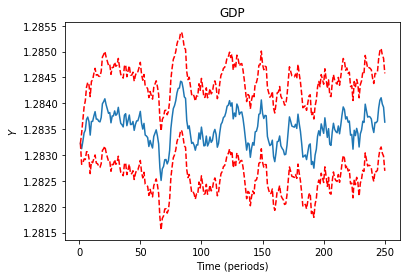

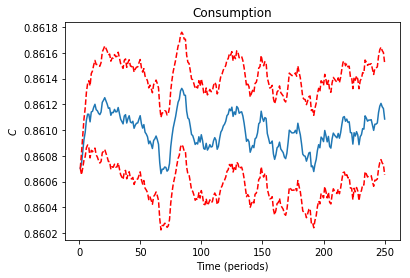

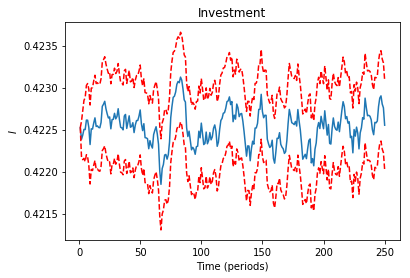

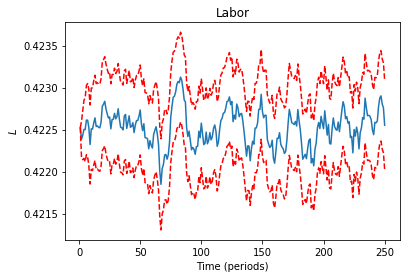

In [33]:
ymean = np.mean(hist_Y, axis = 0)
cmean = np.mean(hist_c, axis = 0)
imean = np.mean(hist_i, axis = 0)
ellmean = np.mean(hist_ell, axis = 0)

ystd = np.std(hist_Y, axis = 0)
ylb = ymean - 1.98 * (ystd) / np.sqrt(iters)
yub = ymean + 1.98 * (ystd) / np.sqrt(iters)
cstd = np.std(hist_c, axis = 0)
clb = cmean - 1.98 * (cstd) / np.sqrt(iters)
cub = cmean + 1.98 * (cstd) / np.sqrt(iters)
istd = np.std(hist_i, axis = 0)
ilb = imean - 1.98 * (istd) / np.sqrt(iters)
iub = imean + 1.98 * (istd) / np.sqrt(iters)
ellstd = np.std(hist_ell, axis = 0)
ellub = ellmean + 1.98 * (ellstd) / np.sqrt(iters)
elllb = ellmean - 1.98 * (ellstd) / np.sqrt(iters)

# GDP
t = np.arange(1, T+1)

plt.plot(t, ymean, '-')
plt.plot(t, ylb, 'r--')
plt.plot(t, yub, 'r--')
plt.xlabel("Time (periods)")
plt.ylabel(r"$Y$")
plt.title("GDP")
plt.show()

#Consumption
plt.plot(t, cmean, '-')
plt.plot(t, clb, 'r--')
plt.plot(t, cub, 'r--')
plt.xlabel("Time (periods)")
plt.ylabel(r"$C$")
plt.title("Consumption")
plt.show()

#Consumption
plt.plot(t, imean, '-')
plt.plot(t, ilb, 'r--')
plt.plot(t, iub, 'r--')
plt.xlabel("Time (periods)")
plt.ylabel(r"$I$")
plt.title("Investment")
plt.show()

#Labor
plt.plot(t, imean, '-')
plt.plot(t, ilb, 'r--')
plt.plot(t, iub, 'r--')
plt.xlabel("Time (periods)")
plt.ylabel(r"$L$")
plt.title("Labor")
plt.show()

In [34]:
hist_k, hist_ell, hist_Y, hist_w, hist_r, hist_T, hist_c, \
    hist_i, hist_u, hist_err, hist_z = sim_periods(T, iters, kbar, ellbar)

